In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="hide/show code."></form>''')

# Отчет по второму заданию по курсу Суперкомпьютерное моделирование и технологии





## 1. Математическая постановка дифференциальное задачи

В прямоугольной области:

$$П = [A_1,A_2] \times [B_1,B_2]$$

требуется найти дважды гладкую функцию $u = u(x,y)$, удовлетворяющую дифференциальному уравнению

$$ - \Delta u = F(x,y), A_1 < x < A_2, B_1 < y < B_2 $$

и дополнительному условию

$$ u(x,y) = \varphi (x,y) $$

во всех граничных точках $(x,y)$ прямоугольника. Оператор Лапласа $ \Delta $ определен равенством:

$$ \Delta u = \frac{\partial ^2 u}{\partial x ^2} + \frac{\partial ^2 u}{\partial y ^2} $$

Вариантом задания определяются функции $F(x,y)$, $\varphi (x,y)$, а также прямоугольная область $П$.





## 2. Разностная схема решения задачи

В расчетной области $Π$ определяется прямоугольная сетка. Для аппроксимации уравнения Пуасона воспользуемся пятиточечным разностным оператором Лапласа $ \Delta _h $.

Тогда приближенным решением дифференциального уравнения с дополнительным условием называеют сеточную функцию $ p = p(x_i, y_j) $, удовлетворяющую уравнениям:

$$ - \Delta _h p_{ij} = F(x_i,y_j) $$

$$ p_{ij} = \varphi(x_i,y_j) $$

Эти соотношения представляют собой систему линейных алгебраических уравнений с чис-
лом уравнений равным числу неизвестных и определяют единственным образом неизвест-
ные значения $ p_{ij} $. Совокупность указанных выше уравнений называется разностной схемой для дифференциальной задачи  дополнительным условием.

Приближенное решение $ p = p(x_i, y_j) $ может быть получено с помощью метода сопряженных градиентов.





## 3. Вариант задания

Задание было выполнено по варианту 13, в котором определяются функции $F(x,y)$ , $ \varphi (x,y) $ , прямоугольная область $П$, норма в пространстве сеточных функций и коэффициент неравномерности сетки:

$$ F(x,y) = 4 (1 - 2(x+y)^2) e^{1 - (x + y)^2} $$

$$ \varphi = e^{1 - (x + y)^2} $$

$$ П = [0,2] \times [0,2] $$

$$ ||u|| = \sqrt{(u,u)} $$

$$ q = \frac{3}{2} $$





## 4. Описание проделанной работы

В рамках данного задания был разработана С++ программа, которая ищет приближенное решение указанного выше дифференциального уравнения с дополнительным условием.

Разработанная программа запускалась на суперкопьютерах "Ломоносов" и "Blue Gene/P".

В программе использованы бибилиотеки MPI и OpenMP для получения существенного ускорения при запуске алгоритма на суперкомпьютерах.





## 5. Результаты расчетов

Результаты запуска реализация алгоритма на суперкомпьютере "Ломоносов":

| Число процессоров | Число точек сетки | Время решения | Ускорение |
| :---------------: | :---------------: | :-----------: | :-------: |
| 1 | 1000 $ \times $ 1000 | 604.466 | 1.0 |
| 8 | 1000 $ \times $ 1000 | 85.89 | 7.03 |
| 16 | 1000 $ \times $ 1000 | 42.07 | 14.37 |
| 32 | 1000 $ \times $ 1000 | 23.07 | 26.2 |
| 64 | 1000 $ \times $ 1000 | 11.77 | 51.36 |
| 128 | 1000 $ \times $ 1000 | 6.67 | 90.62 |
| 2 | 2000 $ \times $ 2000 | 807.92 | 2.0 |
| 8 | 2000 $ \times $ 2000 | 212.74 | 7.59 |
| 16 | 2000 $ \times $ 2000 | 107.3 | 15.05 |
| 32 | 2000 $ \times $ 2000 | 54.24 | 29.79 |
| 64 | 2000 $ \times $ 2000 | 27.32 | 59.14 |
| 128 | 2000 $ \times $ 2000 | 15.08 | 107.15 |

На сетке 2000 $ \times $ 2000 программа, запущенная на одном процессоре, сбрасывается с выполнения системной утилитой slurm. Поэтому для указанной сетки данные в столбце "Ускорение" приводились в сравнении со временем выполнения алгоритма на двух процессорах.

Аналогичная проблема и для суперкомпьютера "Blue Gene/P": здесь временные ограничения выполняются только для запуска реализации на 4-х и более процессорах (как для версии MPI, так и для гибридной версии MPI/OpenMP). Поэтому для суперкомпьютера "Blue Gene/P" в столбце "Ускорение" приведены данные в сравнении с запуском на 4 процессорах.

Результаты запуска MPI реализация алгоритма на суперкомпьютере "Blue Gene/P":

| Число процессоров | Число точек сетки | Время решения | Ускорение |
| :---------------: | :---------------: | :-----------: | :-------: |
| 1 | 1000 $ \times $ 1000 | 2860.4 | 1.0 |
| 128 | 1000 $ \times $ 1000 | 23.05 | 124.1 |
| 256 | 1000 $ \times $ 1000 | 12.08 | 236.79 |
| 512 | 1000 $ \times $ 1000 | 6.54 | 437.37 |
| 4 | 2000 $ \times $ 2000 | 4985.04 | 4.0 |
| 128 | 2000 $ \times $ 2000 | 152.94 | 130.38 |
| 256 | 2000 $ \times $ 2000 | 78.18 | 255.05 |
| 512 | 2000 $ \times $ 2000 | 40.02 | 298.25 |

Результаты запуска гибридной  MPI/OpenMP реализации алгоритма на суперкомпьютере "Blue Gene/P":

| Число процессоров | Число точек сетки | Время решения | Ускорение |
| :---------------: | :---------------: | :-----------: | :-------: |
| 1 | 1000 $ \times $ 1000 | 2131.58 | 1.0 |
| 128 | 1000 $ \times $ 1000 | 17.6923 | 120.5 |
| 256 | 1000 $ \times $ 1000 | 9.49199 | 224.61 |
| 512 | 1000 $ \times $ 1000 | 5.40227 | 394.74 |
| 4 | 2000 $ \times $ 2000 | 3711.91 | 4.0 |
| 128 | 2000 $ \times $ 2000 | 115.11 | 128.99 |
| 256 | 2000 $ \times $ 2000 | 59.32 | 250.29 |
| 512 | 2000 $ \times $ 2000 | 30.92 | 480.2 |





## 6. Точное и приближенное решение на сетке $2000 \times 2000$ узлов


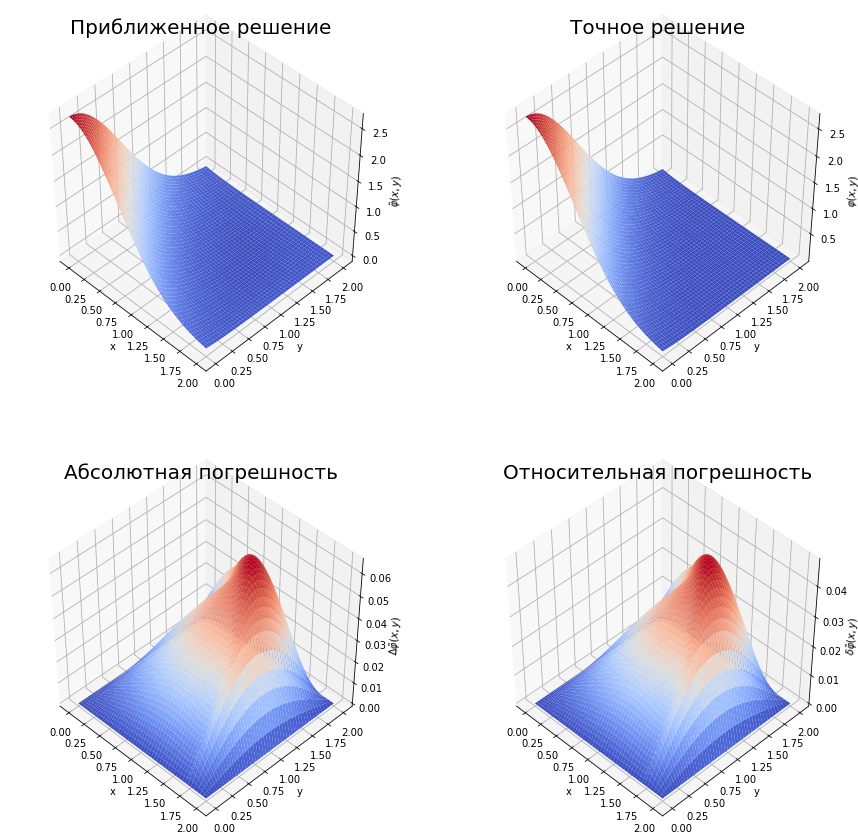

In [18]:
%matplotlib inline
# %matplotlib notebook 

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import math


N = 2000
A = 0.0
B = 2.0
x = np.empty((N, N))
y = np.empty((N, N))
p = np.empty((N, N))
phi_values = np.empty((N, N))
abs_error = np.empty((N, N))
rel_error = np.empty((N, N))
norm = 1.3589


def read_data_from_file(file_name):
    with open(file_name) as f:
        lines = f.readlines()
    return lines

def load_data_from_file(file_name):
    lines = read_data_from_file(file_name)
    for s in lines:
        i, j, xij, yij, pij, phi_ij = s.split()
        i, j = int(i), int(j)
        x[i][j] = float(xij)
        y[i][j] = float(yij)
        p[i][j] = float(pij)
        phi_values[i][j] = float(phi_ij)
        abs_error[i][j] = abs(p[i][j] - phi_values[i][j])
        rel_error[i][j] = abs_error[i][j] / norm;
    

def draw_figure(title, z_label, X, Y, Z, position=111):
    ax = plt.subplot(position, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    plt.title(title, fontsize=20)
    ax.set_xlabel("x", fontsize=10)
    ax.set_ylabel("y", fontsize=10)
    ax.set_zlabel(z_label, fontsize=10)
    ax.view_init(45, -45)

load_data_from_file("p_2000.txt")

fig = plt.figure(figsize=(15, 15))

draw_figure("Приближенное решение", r"$ \tilde{\varphi}(x,y) $", x, y, p, 221)
draw_figure("Точное решение", r"$ \varphi(x,y) $", x, y, phi_values, 222)

draw_figure("Абсолютная погрешность", r"$ \Delta \tilde{\varphi}(x,y) $", x, y, abs_error, 223)
draw_figure("Относительная погрешность", r"$ \delta \tilde{\varphi}(x,y) $", x, y, rel_error, 224)

plt.show()


## Автор

Задание выполнил Романов Андрей Романович, студент 621 группы 2 курса магистратуры ВМК МГУ.